#Distributed Data Analysis and Mining A.A. 2022/2023 - Asteroid Dataset
###Realizzato da Michele Papucci (544376) e Chiara Giurdanella (560686)

# Installazione pacchetti da importare nell'ambiente.  
## Da lanciare una volta all'avvio del notebook.

In [1]:
!pip install pyspark pandas seaborn matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=1ad57b366e2bae7b7a8894d3d0e5b4630e48b9fdce3e6b231ecccc1515a85761
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


# Import statements e Pre-processing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, SQLContext

In [3]:
spark = SparkSession.builder \
    .master("local") \
    .appName("AppName") \
    .getOrCreate()
    
sqlCtx = SQLContext(spark)

/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.csv('/content/drive/MyDrive/dataset.csv', header = True, inferSchema = True)
df.dtypes, df.count()

([('id', 'string'),
  ('spkid', 'int'),
  ('full_name', 'string'),
  ('pdes', 'string'),
  ('name', 'string'),
  ('prefix', 'string'),
  ('neo', 'string'),
  ('pha', 'string'),
  ('H', 'double'),
  ('diameter', 'double'),
  ('albedo', 'double'),
  ('diameter_sigma', 'double'),
  ('orbit_id', 'string'),
  ('epoch', 'double'),
  ('epoch_mjd', 'int'),
  ('epoch_cal', 'double'),
  ('equinox', 'string'),
  ('e', 'double'),
  ('a', 'double'),
  ('q', 'double'),
  ('i', 'double'),
  ('om', 'double'),
  ('w', 'double'),
  ('ma', 'double'),
  ('ad', 'double'),
  ('n', 'double'),
  ('tp', 'double'),
  ('tp_cal', 'double'),
  ('per', 'double'),
  ('per_y', 'double'),
  ('moid', 'double'),
  ('moid_ld', 'double'),
  ('sigma_e', 'double'),
  ('sigma_a', 'double'),
  ('sigma_q', 'double'),
  ('sigma_i', 'double'),
  ('sigma_om', 'double'),
  ('sigma_w', 'double'),
  ('sigma_ma', 'double'),
  ('sigma_ad', 'double'),
  ('sigma_n', 'double'),
  ('sigma_tp', 'double'),
  ('sigma_per', 'double'),
  ('cla

# Dropping Features
### Removing features with no utility to the analysis

In [ ]:
columns_to_delete = ['spkid', 'full_name', 'pdes', 'name', 'prefix', 'orbit_id', 'equinox', 'sigma_e', 'sigma_a', 'sigma_w', 'sigma_i', 'sigma_ma', 'sigma_ad' , 'sigma_tp', 'sigma_per', 'sigma_q', 'sigma_n', 'sigma_om', 'moid', 'moid_ld', 'tp_cal', 'per_y', 'epoch_mjd', 'epoch_cal', 'moid_ld', 'ad', 'per']
columns_to_delete

['spkid',
 'full_name',
 'pdes',
 'name',
 'prefix',
 'orbit_id',
 'equinox',
 'sigma_e',
 'sigma_a',
 'sigma_w',
 'sigma_i',
 'sigma_ma',
 'sigma_ad',
 'sigma_tp',
 'sigma_per',
 'sigma_q',
 'sigma_n',
 'sigma_om',
 'moid',
 'moid_ld',
 'tp_cal',
 'per_y',
 'epoch_mjd',
 'epoch_cal',
 'moid_ld',
 'ad',
 'per']

In [ ]:
df = df.drop(*columns_to_delete)
df.show(5)

+--------+---+---+----+--------+------+--------------+---------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|      id|neo|pha|   H|diameter|albedo|diameter_sigma|    epoch|                  e|                a|                q|                i|               om|                w|               ma|                 n|                tp|class|    rms|
+--------+---+---+----+--------+------+--------------+---------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|a0000001|  N|  N| 3.4|   939.4|  0.09|           0.2|2458600.5| 0.0760090265983052|2.769165148633284|2.558683601195717|10.59406719506626|80.30553090445737|73.59769469844186|77.37209751948711|0.2138852265918273| 2458238.754129318|  MBA|0.43301|
|a0000002|  N|  N| 4

## Pearson Correlation matrix between the features

In [44]:
from pyspark.sql.functions import corr

columns = [col[0] for col in df.dtypes if col[1] != 'string']
corr_matrix = []

tot = len(columns)
for i in range(len(columns)):
    print(f"{i+1}/{tot}")
    corr_row = []
    for j in range(len(columns)):
        corr_val = df.corr(columns[i], columns[j], 'pearson')
        corr_row.append(corr_val)
    corr_matrix.append(corr_row)

from pyspark.sql.types import StructType, StructField, FloatType
schema = StructType([StructField(col, FloatType(), True) for col in columns])
corr_df = spark.createDataFrame(corr_matrix, schema=schema)

1/13
2/13
3/13
4/13
5/13
6/13
7/13
8/13
9/13
10/13
11/13
12/13
13/13


### Extracting the feature couples that have a correlation above a set threshold


In [ ]:
threshold = 0.9
correlated_features = []
for i, row in enumerate(corr_df.collect()):
    for j, col in enumerate(columns):
        corr_val = row[col]
        if abs(corr_val) > threshold and j != i:
            feature1 = columns[i]
            feature2 = col
            correlated_features.append((feature1, feature2, corr_val))
print(len(correlated_features))
correlated_features

46


[('epoch', 'epoch_mjd', 1.0),
 ('epoch', 'epoch_cal', 0.9996373653411865),
 ('epoch_mjd', 'epoch', 1.0),
 ('epoch_mjd', 'epoch_cal', 0.9996373653411865),
 ('epoch_cal', 'epoch', 0.9996373653411865),
 ('epoch_cal', 'epoch_mjd', 0.9996373653411865),
 ('a', 'q', 0.9369397759437561),
 ('a', 'ad', 0.9797700047492981),
 ('a', 'per', 0.9630265831947327),
 ('a', 'per_y', 0.9630265831947327),
 ('a', 'moid', 0.9379855990409851),
 ('a', 'moid_ld', 0.9379855990409851),
 ('q', 'a', 0.9369397759437561),
 ('q', 'moid', 0.9994617700576782),
 ('q', 'moid_ld', 0.9994617700576782),
 ('ad', 'a', 0.9797700047492981),
 ('ad', 'per', 0.9748772978782654),
 ('ad', 'per_y', 0.9748772978782654),
 ('tp', 'tp_cal', 0.9931477904319763),
 ('tp_cal', 'tp', 0.9931477904319763),
 ('per', 'a', 0.9630265831947327),
 ('per', 'ad', 0.9748772978782654),
 ('per', 'per_y', 1.0),
 ('per_y', 'a', 0.9630265831947327),
 ('per_y', 'ad', 0.9748772978782654),
 ('per_y', 'per', 1.0),
 ('moid', 'a', 0.9379855990409851),
 ('moid', 'q',

## Highest Correlating features:

*   'epoch', 'epoch_mjd' e 'epoch_cal' hanno una correlazione intorno al 100% per tanto sono informazioni ridondanti da rimuovere;
* 'a', 'ad', 'q', 'moid', 'moid_ld' hanno correlazioni molto alte >90%;
* 'tp', 'tp_cal' intorno al 100%;




In [ ]:
import joblib
joblib.dump(corr_matrix, '/content/drive/MyDrive/corr_matrix.joblib')

['/content/drive/MyDrive/corr_matrix.joblib']

In [50]:
import numpy as np

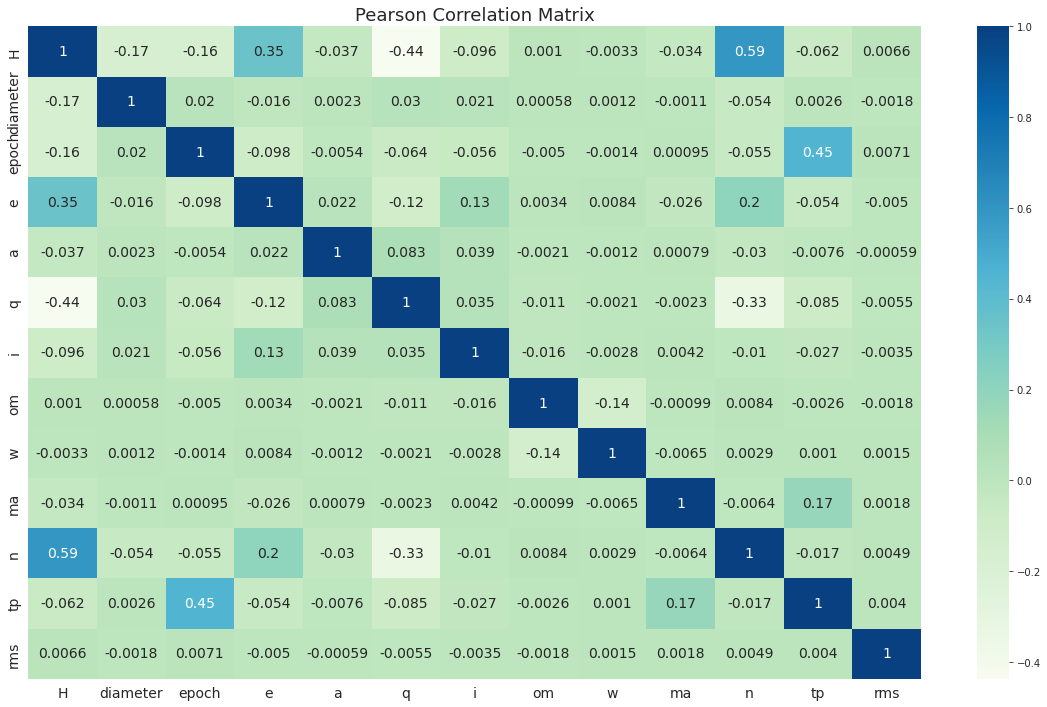

In [53]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(corr_df.toPandas(), ax=ax, annot=True, annot_kws={"size": 14}, cmap="GnBu", yticklabels=column_names)

plt.title("Pearson Correlation Matrix", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

## Missing Values

In [ ]:
from pyspark.sql.functions import *

missing_count = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

In [ ]:
df = df.na.drop(subset=["pha"])

### Missing values as a percentage of the total

In [ ]:
total_rows = df.count()
print(total_rows)
missing_percent = df.select([format_number((count(when(isnull(c), c)) / total_rows)*100, 5).alias(c) for c in df.columns]).show()

938603
+-------+-------+-------+-------+--------+--------+--------------+-------+---------+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|     id|    neo|    pha|      H|diameter|  albedo|diameter_sigma|  epoch|epoch_mjd|epoch_cal|      e|      a|      q|      i|     om|      w|     ma|     ad|      n|     tp| tp_cal|    per|  per_y|moid_ld|  class|    rms|
+-------+-------+-------+-------+--------+--------+--------------+-------+---------+---------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|0.00000|0.00043|0.00000|0.66716|85.48811|85.60595|      85.50175|0.00000|  0.00000|  0.00000|0.00000|0.00000|0.00000|0.00000|0.00000|0.00000|0.00011|0.00043|0.00000|0.00000|0.00000|0.00043|0.00011|0.00000|0.00000|0.00011|
+-------+-------+-------+-------+--------+--------+--------------+-------+---------+---------+-------

### Missing value filling

For 'diameter' and 'albedo' we only have 15% of records with value for them.

Since there is a correlation between 'n' and 'H' we create a simple linear regressor to fill 'H' missing values.

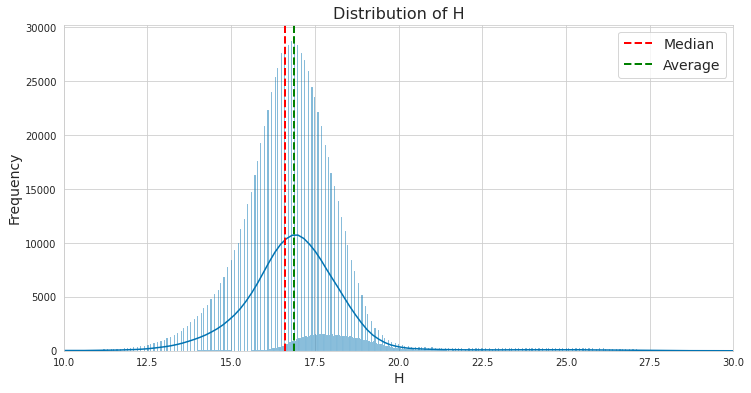

In [ ]:
import seaborn as sns
from pyspark.sql.functions import col

median = df.approxQuantile("H", [0.5], 0.25)[0]
average = df.agg({"H": "avg"}).collect()[0][0]

values = df.select(col("H")).rdd.flatMap(lambda x: x).collect()

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.histplot(values, bins='sqrt', kde=True)
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(average, color='green', linestyle='dashed', linewidth=2, label='Average')
plt.title("Distribution of H", fontsize=16)
plt.xlabel("H", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim(10, 30)
plt.legend(fontsize=14)
plt.show()


In [ ]:
df_filtered = df.filter(~isnull(col('H')))

In [ ]:
from pyspark.sql.functions import *

missing_count = df_filtered.select([count(when(isnull(c), c)).alias(c) for c in df_filtered.columns]).show()

+---+-----+---------+----+------+------+---+-----+---+--------+------+--------------+--------+-----+---------+---------+-------+---+---+---+---+---+---+---+---+---+---+------+---+-----+-----+-------+-------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-----+---+
| id|spkid|full_name|pdes|  name|prefix|neo|  pha|  H|diameter|albedo|diameter_sigma|orbit_id|epoch|epoch_mjd|epoch_cal|equinox|  e|  a|  q|  i| om|  w| ma| ad|  n| tp|tp_cal|per|per_y| moid|moid_ld|sigma_e|sigma_a|sigma_q|sigma_i|sigma_om|sigma_w|sigma_ma|sigma_ad|sigma_n|sigma_tp|sigma_per|class|rms|
+---+-----+---------+----+------+------+---+-----+---+--------+------+--------------+--------+-----+---------+---------+-------+---+---+---+---+---+---+---+---+---+---+------+---+-----+-----+-------+-------+-------+-------+-------+--------+-------+--------+--------+-------+--------+---------+-----+---+
|  0|    0|        0|   0|930197|952243|  4|19920|  0|  820216|821021|        820344|   

We start the regression by creating the dataset

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['n'], outputCol='features')
training_set = assembler.transform(df_filtered).select('features', 'H')

In [ ]:
training_set.show()
training_set.count()

+--------------------+----+
|            features|   H|
+--------------------+----+
|[0.2138852265918273]| 3.4|
| [0.213344586343708]| 4.2|
|[0.2261286975791392]|5.33|
|[0.2716094018601813]| 3.0|
|[0.2386612027776379]| 6.9|
| [0.261073030707869]| 5.8|
|[0.2671917339417878]| 5.6|
| [0.301752787794208]| 6.5|
|[0.2673909432494424]| 6.3|
|[0.1769312474587196]| 5.5|
|[0.2566373296054931]| 6.5|
|[0.2764488869412948]| 7.3|
|[0.2383796233436503]| 6.8|
|[0.2369552242545301]| 6.5|
|[0.2292917057660575]| 5.2|
| [0.197247210122191]| 5.9|
|[0.2537489562861365]| 7.7|
|[0.2833537102104169]| 6.6|
|[0.2581409991467521]| 7.3|
|[0.2635433278105402]| 6.5|
+--------------------+----+
only showing top 20 rows



952261

We train a linear regression on the dataset

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol='features', labelCol='H')
model = lr.fit(training_set)

Before using it to fill the missing values we split the training set to evaluate the performance of the linear regressor on this task

In [ ]:
from pyspark.sql.functions import rand
training_eva = training_set.withColumnRenamed("H", "label")
train, test = training_eva.randomSplit([0.9, 0.1], seed=42)
lr = LinearRegression(featuresCol='features', labelCol='label')
evaluation_model = lr.fit(train)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = evaluation_model.transform(test)
evaluator = RegressionEvaluator(metricName="r2")
r2_score = evaluator.evaluate(predictions)
print("R2 score on test set = %g" % r2_score)

R2 score on test set = 0.346282


In [ ]:
mean_label = training_set.agg(mean('H')).collect()[0][0]

We create a dummy prediction set where each prediction is the mean 

In [ ]:
mean_col = lit(mean_label)
dummy_predictions = predictions.withColumn('prediction', mean_col)

In [ ]:
dummy_predictions.show()

+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|[8.69357884225596...|  7.3|16.90641122769915|
|[9.75790318854942...|  6.4|16.90641122769915|
|[0.00271158890787...|  6.4|16.90641122769915|
|[0.00300306503453...|  7.3|16.90641122769915|
|[0.00327938747735...|  6.3|16.90641122769915|
|[0.00338058007058...|  6.6|16.90641122769915|
|[0.00343962139332...|  7.4|16.90641122769915|
|[0.00344801204347...|  7.1|16.90641122769915|
|[0.00353013765503...|  3.6|16.90641122769915|
|[0.00397670531511...|  7.8|16.90641122769915|
|[0.00400170195890...|  7.5|16.90641122769915|
|[0.00404957040881...|  6.5|16.90641122769915|
|[0.00422810943354...|  7.6|16.90641122769915|
|[0.00734204033990...|  9.5|16.90641122769915|
|[0.01143016013066...|  8.8|16.90641122769915|
|[0.01478129799373...|  7.5|16.90641122769915|
|[0.07895188501954...| 12.9|16.90641122769915|
|[0.07971683509935...| 12.5|16.90641122769915|
|[0.079846110

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pd = predictions.toPandas()

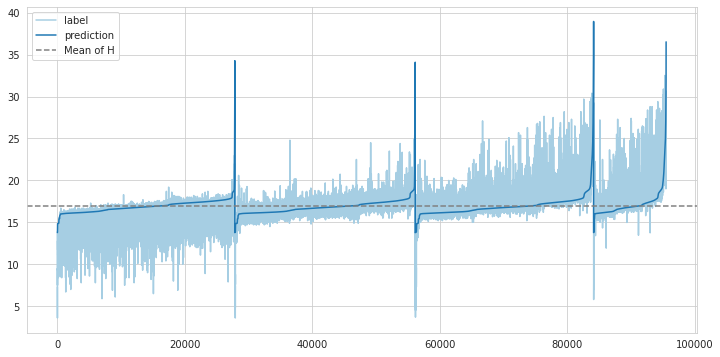

In [ ]:
true_values = df_pd['label']
predicted_values = df_pd['prediction']
features = df_pd['features']

mean_label = df_pd['label'].mean()

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('Paired', n_colors=2)
sns.lineplot(data=[true_values, predicted_values], dashes=False)

plt.axhline(y=mean_label, color='gray', linestyle='--', label="Mean of H")
plt.legend()
plt.show()

In [ ]:
evaluator = RegressionEvaluator(metricName="r2")
r2_score = evaluator.evaluate(dummy_predictions)
print("R2 score on test set = %g" % r2_score)

R2 score on test set = -2.6225e-06


We extrapolate the records with missing 'H' values to use our regressor on

In [ ]:
df_missing = df.filter(isnull(col('H')))
df_missing.show()

+--------+-------+-------------------+----------+----+------+---+---+----+--------+------+--------------+--------+---------+---------+-----------+-------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-------------------+-----------------+--------------------+------------------+------------------+-----------------+----------------+--------+------------+---------+---------+---------+--------+--------+--------+--------+---------+---------+--------+---------+-----+---------+
|      id|  spkid|          full_name|      pdes|name|prefix|neo|pha|   H|diameter|albedo|diameter_sigma|orbit_id|    epoch|epoch_mjd|  epoch_cal|equinox|                  e|                a|                q|                i|               om|                w|                 ma|               ad|                   n|                tp|            tp_cal|              per|           per_y|    moid|     moid_ld|  sigma_e|  sigma_a|  sigma_q| sigma_i|sig

In [ ]:
df_missing_transformed = assembler.transform(df_missing).select('id','features')

We predict the H values and we join the dataset back

In [ ]:
df_predicted = model.transform(df_missing_transformed.select('features'))

df_predicted = df_predicted.withColumnRenamed('prediction', 'H_predicted')

df_result = df_missing_transformed.join(df_predicted, 'features', 'left')
df_result.show()

+--------------------+--------+------------------+
|            features|      id|       H_predicted|
+--------------------+--------+------------------+
|[0.00333742503348...|bK04PB2C|13.810518217908296|
|[0.1283136526920373]|bJ99CD0B|15.469466665946772|
|[0.1402878815108578]|bK04F16T|15.628413920857614|
|[0.1648955224408668]|bJ99CD0E| 15.95505850355583|
| [0.169611289280527]|bJ99CF4M|16.017656120931026|
|[0.1718037295877133]|bK08R93J|16.046758819205458|
|[0.1743112173438867]|bK06KE4A| 16.08004349261506|
|[0.1770032207237843]|bJ97T00N| 16.11577744708676|
|[0.1783943143826898]|bJ97T00M| 16.13424298017056|
|[0.1790939327930452]|bK15W12Q| 16.14352979333353|
|[0.1833399977060545]|bK08F27S|16.199892534709853|
|[0.1843692353508682]|bK08T24B|16.213554750520935|
|[0.1898984312421056]|bJ99CF5M| 16.28694991626181|
|[0.1899784638191895]|bK08V09Z| 16.28801227765672|
|[0.1949588311909496]|bK15W12K|16.354122232140348|
|[0.2006924891559956]|bK15VF1U|  16.4302314503565|
|[0.2015534749916494]|bJ99CF4N|

In [ ]:
columns = [col for col in df.columns if col not in ['id', 'H']]

In [ ]:
joined_df = df.join(df_result, on='id', how='left')

merged_df = joined_df.select(
    "id",
    when(isnull(col('H')), col("H_predicted")).otherwise(col("H")).alias("H"),
    *columns
)

merged_df.show()

+--------+----+---+---+--------+------+--------------+---------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|      id|   H|neo|pha|diameter|albedo|diameter_sigma|    epoch|                  e|                a|                q|                 i|               om|                w|               ma|                 n|                tp|class|    rms|
+--------+----+---+---+--------+------+--------------+---------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|a0000011| 6.5|  N|  N| 142.887| 0.191|         1.008|2459000.5| 0.0998233151940724|2.452389779437578|2.207584101506059| 4.631824772294455|125.5283793492349|195.3590505295931|21.70182201529093|0.2566373296054931| 2458915.937781212|  MBA|0.46367|
|a0000018| 6.6| 

In [ ]:
from pyspark.sql.functions import *

missing_count = merged_df.select([count(when(isnull(c), c)).alias(c) for c in merged_df.columns]).show()

+---+---+---+---+--------+------+--------------+-----+---+---+---+---+---+---+---+---+---+-----+---+
| id|  H|neo|pha|diameter|albedo|diameter_sigma|epoch|  e|  a|  q|  i| om|  w| ma|  n| tp|class|rms|
+---+---+---+---+--------+------+--------------+-----+---+---+---+---+---+---+---+---+---+-----+---+
|  0|  0|  4|  0|  802394|803500|        802522|    0|  0|  0|  0|  0|  0|  0|  1|  0|  0|    0|  1|
+---+---+---+---+--------+------+--------------+-----+---+---+---+---+---+---+---+---+---+-----+---+



### Other missing values
For neo, ma e rms, since there are few missing values, we simply dropped the rows

In [ ]:
df = merged_df.na.drop(subset=["neo"])
df = df.na.drop(subset=['ma'])
df = df.na.drop(subset=['rms'])
df.show()

+--------+----+---+---+--------+------+--------------+---------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|      id|   H|neo|pha|diameter|albedo|diameter_sigma|    epoch|                  e|                a|                q|                 i|               om|                w|               ma|                 n|                tp|class|    rms|
+--------+----+---+---+--------+------+--------------+---------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|a0000011| 6.5|  N|  N| 142.887| 0.191|         1.008|2459000.5| 0.0998233151940724|2.452389779437578|2.207584101506059| 4.631824772294455|125.5283793492349|195.3590505295931|21.70182201529093|0.2566373296054931| 2458915.937781212|  MBA|0.46367|
|a0000018| 6.6| 

In [ ]:
from pyspark.sql.functions import *

missing_count = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---+---+---+---+--------+------+--------------+-----+---+---+---+---+---+---+---+---+---+-----+---+
| id|  H|neo|pha|diameter|albedo|diameter_sigma|epoch|  e|  a|  q|  i| om|  w| ma|  n| tp|class|rms|
+---+---+---+---+--------+------+--------------+-----+---+---+---+---+---+---+---+---+---+-----+---+
|  0|  0|  0|  0|  802388|803494|        802516|    0|  0|  0|  0|  0|  0|  0|  0|  0|  0|    0|  0|
+---+---+---+---+--------+------+--------------+-----+---+---+---+---+---+---+---+---+---+-----+---+



In [ ]:
df.write.csv("/content/drive/MyDrive/dataset_H_almost_no_missing_val", header=True)

In [ ]:
df = df.drop('diameter_sigma')

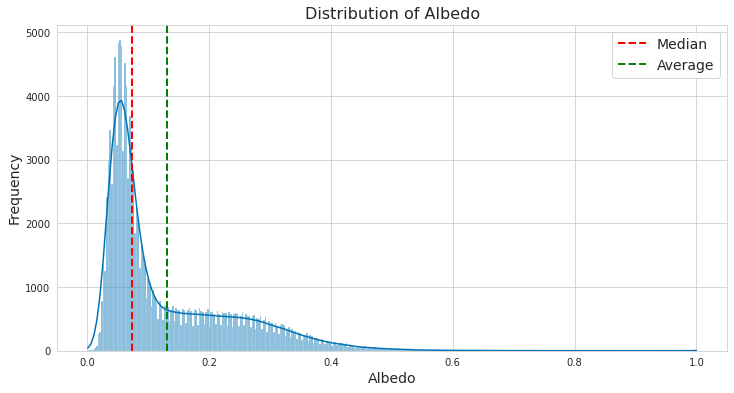

In [ ]:
import seaborn as sns
from pyspark.sql.functions import col

median = df.approxQuantile("albedo", [0.5], 0.25)[0]
average = df.agg({"albedo": "avg"}).collect()[0][0]

values = df.select(col("albedo")).rdd.flatMap(lambda x: x).collect()

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.histplot(values, bins='sqrt', kde=True)
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(average, color='green', linestyle='dashed', linewidth=2, label='Average')
plt.title("Distribution of Albedo", fontsize=16)
plt.xlabel("Albedo", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=14)
plt.show()


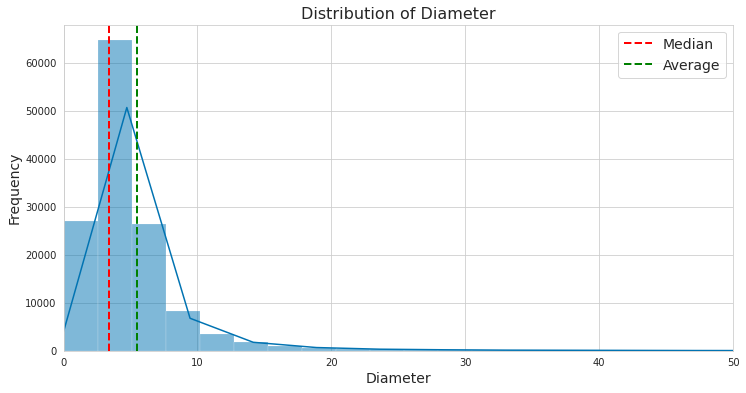

In [ ]:
import seaborn as sns
from pyspark.sql.functions import col

median = df.approxQuantile("diameter", [0.5], 0.25)[0]
average = df.agg({"diameter": "avg"}).collect()[0][0]

values = df.select(col("diameter")).rdd.flatMap(lambda x: x).collect()

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.histplot(values, bins='sqrt', kde=True)
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(average, color='green', linestyle='dashed', linewidth=2, label='Average')
plt.title("Distribution of Diameter", fontsize=16)
plt.xlabel("Diameter", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlim(0, 50)
plt.legend(fontsize=14)
plt.show()


In [ ]:
mean_diameter = df.select(mean("diameter")).collect()[0][0]

df = df.fillna(mean_diameter, subset=['diameter'])
df.show()

+--------+----+---+---+--------+------+---------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|      id|   H|neo|pha|diameter|albedo|    epoch|                  e|                a|                q|                 i|               om|                w|               ma|                 n|                tp|class|    rms|
+--------+----+---+---+--------+------+---------+-------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+
|a0000011| 6.5|  N|  N| 142.887| 0.191|2459000.5| 0.0998233151940724|2.452389779437578|2.207584101506059| 4.631824772294455|125.5283793492349|195.3590505295931|21.70182201529093|0.2566373296054931| 2458915.937781212|  MBA|0.46367|
|a0000018| 6.6|  N|  N| 139.594| 0.181|2459000.5| 0.2175053316026563|2.29570

In [ ]:
from pyspark.sql.functions import *

missing_count = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---+---+---+---+--------+------+-----+---+---+---+---+---+---+---+---+---+-----+---+
| id|  H|neo|pha|diameter|albedo|epoch|  e|  a|  q|  i| om|  w| ma|  n| tp|class|rms|
+---+---+---+---+--------+------+-----+---+---+---+---+---+---+---+---+---+-----+---+
|  0|  0|  0|  0|       0|803494|    0|  0|  0|  0|  0|  0|  0|  0|  0|  0|    0|  0|
+---+---+---+---+--------+------+-----+---+---+---+---+---+---+---+---+---+-----+---+



In [ ]:
df = df.drop('albedo')

In [ ]:
missing_count = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---+---+---+---+--------+-----+---+---+---+---+---+---+---+---+---+-----+---+
| id|  H|neo|pha|diameter|epoch|  e|  a|  q|  i| om|  w| ma|  n| tp|class|rms|
+---+---+---+---+--------+-----+---+---+---+---+---+---+---+---+---+-----+---+
|  0|  0|  0|  0|       0|    0|  0|  0|  0|  0|  0|  0|  0|  0|  0|    0|  0|
+---+---+---+---+--------+-----+---+---+---+---+---+---+---+---+---+-----+---+



After studying the behaviour of the variables we decided to fill 'diameter' with the means and to drop 'albedo'

In [ ]:
df.write.csv("/content/drive/MyDrive/dataset_preprocessed", header=True)

# Fitting models to PHA

In [24]:
df = spark.read.csv('/content/drive/MyDrive/dataset_preprocessed2', header=True, inferSchema=True)

In [30]:
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
df.groupBy("pha").agg(count("*").alias("frequency")).show()

+---+---------+
|pha|frequency|
+---+---------+
|  Y|     2066|
|  N|   936531|
+---+---------+



We define a function to pre-process the data for the classifications. Basically we index the labels to integer values, then we vectorize the data into a single cell, and finally scale the data to have a normal distribution using the Standard Scaler. On the pre-processed dataset we apply a random split to obtain train and test datasets.

In [26]:
def get_training_data(og_df, target_col):
  data = og_df.orderBy(rand())

  indexer = StringIndexer(inputCol=target_col, outputCol="label")
  indexer = indexer.fit(data)
  indexed_data = indexer.transform(data)
  print(indexer.labels)

  feature_cols = [col for col in indexed_data.columns if col not in ['label', 'rms', 'id', 'pha', 'neo', 'class']]
  assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

  data = assembler.transform(indexed_data)
  input_data = data.select('features', 'label')
  scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
  scaler = scaler.fit(input_data)
  scaled_data = scaler.transform(input_data).select('scaled_features', 'label')
  train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)
  return train_data, test_data

We train a SVM on default hyperparameters (grid search resulted to be very computationally heavy). We fit it on the training set and evaluate it on the test and print a bunch of metrics.

In [27]:
def train_and_evaluate_svm(train_data, test_data):
  svm = LinearSVC(featuresCol="scaled_features", labelCol="label")

  model = svm.fit(train_data)
  predictions = model.transform(test_data)

  evaluator = BinaryClassificationEvaluator(labelCol="label")

  auc = evaluator.evaluate(predictions)

  print("AUC = %g" % auc)

  predictions_and_labels = predictions.select(['prediction', 'label']).rdd
  metrics = MulticlassMetrics(predictions_and_labels)
  confusion_matrix = metrics.confusionMatrix().toArray()
  print("Confusion Matrix:")
  print(confusion_matrix)
  print("weighted precision: " + str(metrics.weightedPrecision))
  print("weighted recall: " + str(metrics.weightedRecall))
  print("weighted F-score: " + str(metrics.weightedFMeasure()))
  print("precision for class 0: " + str(metrics.precision(0.0)))
  print("recall for class 0: " + str(metrics.recall(0.0)))
  print("precision for class 1: " + str(metrics.precision(1.0)))
  print("recall for class 1: " + str(metrics.recall(1.0)))


  return model, predictions

In [ ]:
train, test = get_training_data(df, 'pha')

['N', 'Y']


In [ ]:
svm_model, svm_predictions = train_and_evaluate_svm(train, test)

AUC = 0.991745


/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
[[187238.      0.]
 [   422.      0.]]
weighted precision: 0.9955075613958451
weighted recall: 0.997751252264734
weighted F-score: 0.9966281440367475
precision for class 0: 0.997751252264734
recall for class 0: 1.0
precision for class 1: 0.0
recall for class 1: 0.0


Same as the SVM we simply train the GBTClassifier with default hyperparameters and we evaluate it on the same train/test split. We then print a bunch of metrics

In [28]:
from pyspark.ml.classification import GBTClassifier

def train_and_evaluate_GBOOST(train_data, test_data):
  gbt = GBTClassifier(featuresCol="scaled_features", labelCol="label")

  model = gbt.fit(train_data)
  predictions = model.transform(test_data)

  evaluator = BinaryClassificationEvaluator(labelCol="label")

  auc = evaluator.evaluate(predictions)

  print("AUC = %g" % auc)

  predictions_and_labels = predictions.select(['prediction', 'label']).rdd
  metrics = MulticlassMetrics(predictions_and_labels)
  confusion_matrix = metrics.confusionMatrix().toArray()
  print("Confusion Matrix:")
  print(confusion_matrix)
  print("weighted precision: " + str(metrics.weightedPrecision))
  print("weighted recall: " + str(metrics.weightedRecall))
  print("weighted F-score: " + str(metrics.weightedFMeasure()))
  print("precision for class 0: " + str(metrics.precision(0.0)))
  print("recall for class 0: " + str(metrics.recall(0.0)))
  print("precision for class 1: " + str(metrics.precision(1.0)))
  print("recall for class 1: " + str(metrics.recall(1.0)))


  return model, predictions

In [ ]:
gboost, gboost_predictions = train_and_evaluate_GBOOST(train, test)

AUC = 0.993551


/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
[[187236.      2.]
 [   415.     11.]]
weighted precision: 0.9974442349601418
weighted recall: 0.9977779435587006
weighted F-score: 0.9967339405285626
precision for class 0: 0.9977884477034495
recall for class 0: 0.9999893184075882
precision for class 1: 0.8461538461538461
recall for class 1: 0.025821596244131457


We undersample the training set to have the same number of elements of class 'Y' and 'N', we train then a gboost and evaluate on the original test set.

In [ ]:
majority_df = train.filter(df.pha == "N")
minority_df = train.filter(df.pha == "Y")

fraction = minority_df.count() / train.count()

undersampled_majority_df = majority_df.sampleBy('pha', fractions={'N': fraction}, seed=42)

undersampled_df = minority_df.union(undersampled_majority_df)

undersampled_train = undersampled_df.orderBy(rand())

In [ ]:
undersampled_train.groupBy("label").agg(count("*").alias("frequency")).show()

+-----+---------+
|label|frequency|
+-----+---------+
|  1.0|     1660|
|  0.0|     1659|
+-----+---------+



In [ ]:
us_gboost, us_gboost_predictions = train_and_evaluate_GBOOST(undersampled_train, test)

AUC = 0.996022
Confusion Matrix:
[[184544.   2642.]
 [     0.    450.]]
weighted precision: 0.9979507748577198
weighted recall: 0.98591954635571
weighted F-score: 0.9911208586000564
precision for class 0: 1.0
recall for class 0: 0.9858856965798725
precision for class 1: 0.14553686934023286
recall for class 1: 1.0


# Explainability

Using the test set from before, we take the prediction made on it and merge the two dataset

In [ ]:
prediction_training_set = test.join(us_gboost_predictions, "scaled_features")
prediction_training_set.show()

+--------------------+-----+-----+--------------------+--------------------+----------+
|     scaled_features|label|label|       rawPrediction|         probability|prediction|
+--------------------+-----+-----+--------------------+--------------------+----------+
|[0.11128941865451...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[1.33547302385419...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[1.78063069847226...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[2.00320953578129...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[2.17014366376306...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[2.22578837309032...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[2.28143308241758...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[2.39272250107210...|  0.0|  0.0|[1.54350200272498...|[0.95635347857270...|       0.0|
|[2.50401191972661...|  0.0|  0.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
explainability_training = prediction_training_set.select('scaled_features', 'prediction')
ex_train = explainability_training.withColumnRenamed("prediction", "label")

We use a decision tree as a surrogate model to explain the gboost according to the TREEPAN method by training the tree on the predicted labels.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="scaled_features", maxDepth=4)
model = dt.fit(ex_train)

We extract the dot_data to draw the tree

In [ ]:
dot_data = model._call_java("toDebugString")

In [ ]:
dot_data

'DecisionTreeClassificationModel: uid=DecisionTreeClassifier_eec48d210e79, depth=4, numNodes=9, numClasses=2, numFeatures=12\n  If (feature 5 <= 0.5599027451713299)\n   If (feature 9 <= 0.07924587237070917)\n    If (feature 2 <= 3485.6863672521476)\n     Predict: 0.0\n    Else (feature 2 > 3485.6863672521476)\n     If (feature 7 <= 0.08291744311221888)\n      Predict: 0.0\n     Else (feature 7 > 0.08291744311221888)\n      Predict: 1.0\n   Else (feature 9 > 0.07924587237070917)\n    Predict: 1.0\n  Else (feature 5 > 0.5599027451713299)\n   Predict: 0.0\n'

In [ ]:
feature_cols = [col for col in df.columns if col not in ['label', 'rms', 'id', 'pha', 'neo', 'class']]

In [ ]:
for index, feat in enumerate(feature_cols):
  print(index, feat)

0 H
1 diameter
2 epoch
3 e
4 a
5 q
6 i
7 om
8 w
9 ma
10 n
11 tp


We extract the feature importance to compare it against the Decision tree splits

In [ ]:
feature_importances = us_gboost.featureImportances

In [ ]:
feature_importances

SparseVector(12, {0: 0.0068, 1: 0.0, 2: 0.0028, 3: 0.0103, 4: 0.0086, 5: 0.9244, 6: 0.0133, 7: 0.0067, 8: 0.0092, 9: 0.0064, 10: 0.0063, 11: 0.0051})

In [ ]:
feat = {}
for index, value in enumerate(feature_importances):
  feat[feature_cols[index]] = value

In [ ]:
feat

{'H': 0.006836358853359786,
 'diameter': 4.864755220984198e-16,
 'epoch': 0.002816553181794318,
 'e': 0.01031717569656276,
 'a': 0.008641881628611995,
 'q': 0.9244261568218762,
 'i': 0.013280163653434703,
 'om': 0.006728031495115179,
 'w': 0.009162886242976093,
 'ma': 0.0063694942107942135,
 'n': 0.0063012414303633985,
 'tp': 0.0051200567851108405}

In [ ]:
total_rows = df.count()

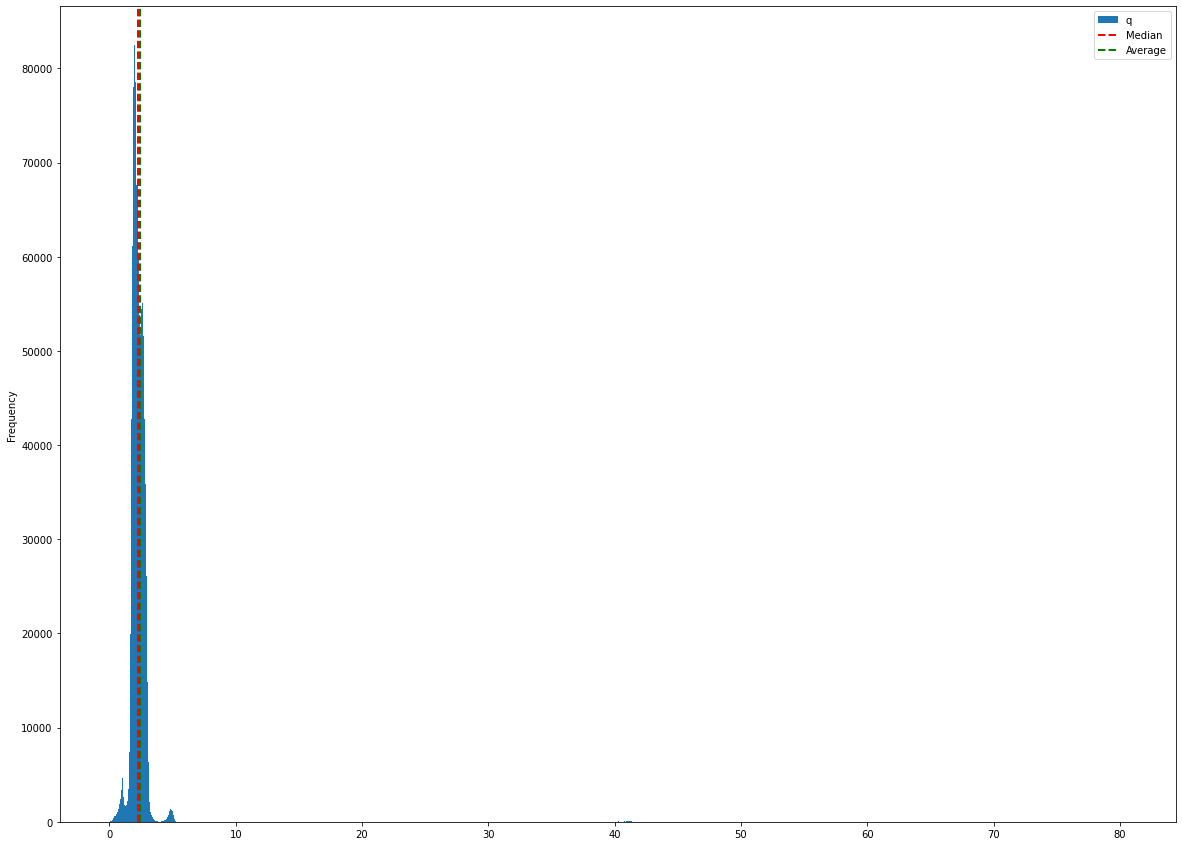

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

pandas_df = df.select("q").toPandas()

median = np.median(pandas_df["q"])
average = np.mean(pandas_df["q"])

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(20)

pandas_df.plot.hist(ax=ax, bins=math.ceil(math.sqrt(total_rows)))
ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
ax.axvline(average, color='green', linestyle='dashed', linewidth=2, label='Average')
ax.legend()
plt.show()


# Clustering

In [10]:
from pyspark.sql.functions import *

In [11]:
df = spark.read.csv('/content/drive/MyDrive/dataset_preprocessed2', header=True, inferSchema=True)

In [22]:
distinct_values = df.select(col('class')).distinct().rdd.map(lambda row: row[0]).collect()

In [23]:
distinct_values

['OMB',
 'IEO',
 'ATE',
 'TJN',
 'APO',
 'AST',
 'TNO',
 'IMB',
 'MCA',
 'AMO',
 'CEN',
 'MBA']

In [24]:
len(distinct_values)

12

In [8]:
possible_ks = range(4, 30)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler, MinMaxScaler

In [13]:
feature_cols = [col for col in df.columns if col not in ['label', 'rms', 'id', 'pha', 'neo', 'class']]

We fit a bunch of k-means on different ks to see how SSE and Silhoette scores changes

In [30]:
def train_kmeans(df, k):
    kmeans = KMeans(featuresCol='scaled_features', k=k)
    model = kmeans.fit(df)
    predictions = model.transform(df)
    evaluator = ClusteringEvaluator(featuresCol='scaled_features', predictionCol='prediction')
    sse = model.summary.trainingCost
    silhouette_score = evaluator.evaluate(predictions)
    return sse, silhouette_score

sse_values = []
silhouette_scores = []

assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
training = assembler.transform(df)

scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler = scaler.fit(training)
scaled_data = scaler.transform(training).select('scaled_features')

for i, k in enumerate(possible_ks):
    print(f"{i+1}/{len(possible_ks)}")
    sse, silhouette_score = train_kmeans(scaled_data, k)
    sse_values.append(sse)
    silhouette_scores.append(silhouette_score)

1/26
2/26
3/26
4/26
5/26
6/26
7/26
8/26
9/26
10/26
11/26
12/26
13/26
14/26
15/26
16/26
17/26
18/26
19/26
20/26
21/26
22/26
23/26
24/26
25/26
26/26


In [39]:
scaled_data.show()

+--------------------+
|     scaled_features|
+--------------------+
|[0.25072886297376...|
|[0.30903790087463...|
|[0.33819241982507...|
|[0.30029154518950...|
|[0.32361516034985...|
|[0.30903790087463...|
|[0.32361516034985...|
|[0.35276967930029...|
|[0.37026239067055...|
|[0.34693877551020...|
|[0.39358600583090...|
|[0.41982507288629...|
|[0.32944606413994...|
|[0.41982507288629...|
|[0.40524781341107...|
|[0.32653061224489...|
|[0.36443148688046...|
|[0.41690962099125...|
|[0.37900874635568...|
|[0.37609329446064...|
+--------------------+
only showing top 20 rows



In [31]:
import joblib
to_dump = {
    'ks': possible_ks,
    'sse': sse_values,
    "silhouette": silhouette_scores
}
joblib.dump(to_dump, '/content/drive/MyDrive/clustering_ddam_4_30_min_maxed.joblib')

['/content/drive/MyDrive/clustering_ddam_4_30_min_maxed.joblib']

We fitted and evaluated K-means both using a minmaxscaler and a standard scaler

In [ ]:
import numpy as np

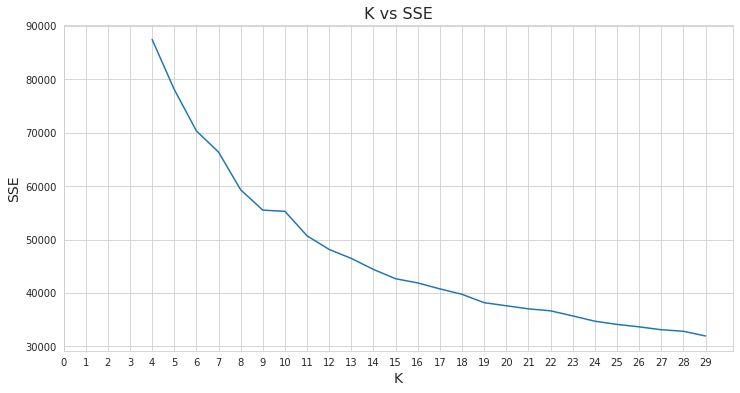

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('colorblind')

sns.lineplot(x=possible_ks, y=sse_values, ax=ax)
ax.set_xticks(np.arange(0, 30, 1))
plt.title("K vs SSE", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.show()

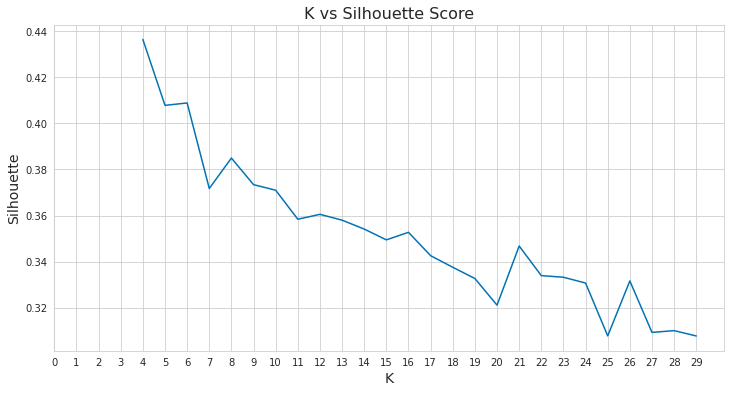

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('colorblind')

sns.lineplot(x=possible_ks, y=silhouette_scores, ax=ax)
ax.set_xticks(np.arange(0, 30, 1))
plt.title("K vs Silhouette Score", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("Silhouette", fontsize=14)
plt.show()

In [38]:
print(silhouette_scores[8])
print(sse_values[8])

0.3605279207450878
48133.30208495464


In [42]:
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
training = assembler.transform(df)
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler = scaler.fit(training)
scaled_data = scaler.transform(training)

In [43]:
scaled_data.show()

+--------+----+---+---+-----------------+---------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+--------------------+--------------------+
|      id|   H|neo|pha|         diameter|    epoch|                  e|                a|                q|                i|               om|                w|               ma|                 n|                tp|class|    rms|            features|     scaled_features|
+--------+----+---+---+-----------------+---------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+--------------------+--------------------+
|a0000030| 7.5|  N|  N|           92.787|2459000.5| 0.1277283574746817|2.365084760499888|2.062996368752836|  2.0960220814384|307.4686450217896|87.31846224913431|137.5647324108804

In [44]:
kmeans = KMeans(featuresCol='scaled_features', k=8)
model = kmeans.fit(scaled_data)
predictions = model.transform(scaled_data)

In [45]:
predictions.show()

+--------+----+---+---+-----------------+---------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+--------------------+--------------------+----------+
|      id|   H|neo|pha|         diameter|    epoch|                  e|                a|                q|                i|               om|                w|               ma|                 n|                tp|class|    rms|            features|     scaled_features|prediction|
+--------+----+---+---+-----------------+---------+-------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----+-------+--------------------+--------------------+----------+
|a0000030| 7.5|  N|  N|           92.787|2459000.5| 0.1277283574746817|2.365084760499888|2.062996368752836|  2.0960220814384|307.4686450217896|87

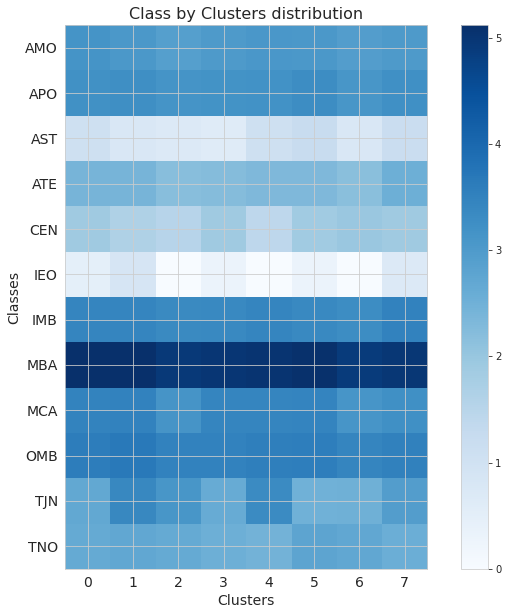

In [47]:
classCounts = predictions.groupBy("prediction", "class").count().orderBy("prediction", "class")

pandasDF = classCounts.toPandas()

pivotDF = pandasDF.pivot(index="class", columns="prediction", values="count")

pivotDF_log = np.log10(pivotDF.values)

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(12)

sns.set_style(style=None)
plt.imshow(pivotDF_log, cmap="Blues")

plt.yticks(range(len(pivotDF.index)), pivotDF.index)

plt.colorbar()

plt.title("Class by Clusters distribution", fontsize=16)
plt.xlabel("Clusters", fontsize=14)
plt.ylabel("Classes", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)

plt.show()


In [48]:
import joblib
data = joblib.load('/content/drive/MyDrive/clustering_ddam_4_30_normalized.joblib')
possible_ks = data['ks']
sse_values = data['sse']
silhouette_scores = data['silhouette']

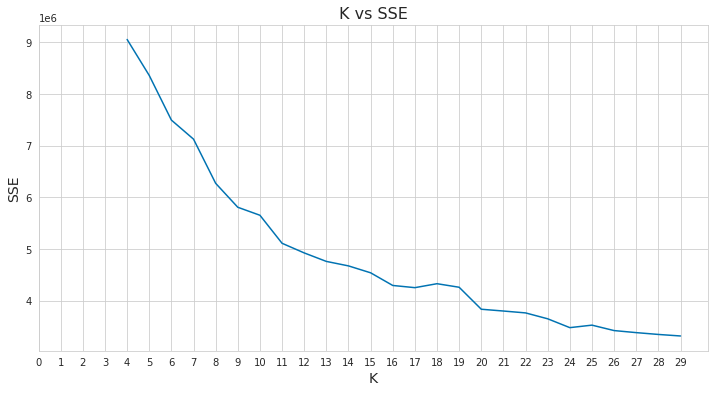

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('colorblind')

sns.lineplot(x=possible_ks, y=sse_values, ax=ax)
ax.set_xticks(np.arange(0, 30, 1))
plt.title("K vs SSE", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.show()

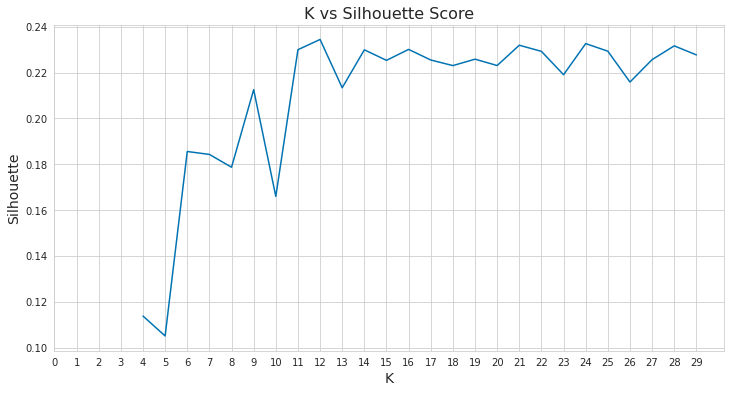

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.set_palette('colorblind')

sns.lineplot(x=possible_ks, y=silhouette_scores, ax=ax)
ax.set_xticks(np.arange(0, 30, 1))
plt.title("K vs Silhouette Score", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("Silhouette", fontsize=14)
plt.show()

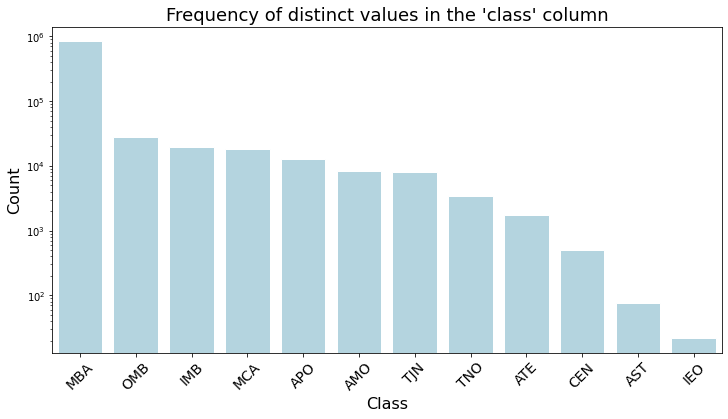

In [27]:
import seaborn as sns
from pyspark.sql.functions import col

classCounts = df.groupBy("class").count().orderBy("count", ascending=False)

classVals = [row["class"] for row in classCounts.collect()]
countVals = [row["count"] for row in classCounts.collect()]

fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(12)

sns.set_style('whitegrid')
sns.barplot(x=classVals, y=countVals, color="lightblue")

plt.xlabel("Class", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Frequency of distinct values in the 'class' column", fontsize=18)
plt.yscale('log')

plt.xticks(rotation=45, fontsize=14)

plt.show()